**Aim: _to predict fradulent credit card transaction using deep learning model. This is crucial for bank's as well as customer's perspective, Every fraud is a loss to the bank as the bank is responsible for the fraud transaction and bank cannot afford that. so here while creating the model we need to be more concern about fraudulent data._**

**#import all necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**#get the data**

In [ ]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**#EDA**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

NO null value is present in any of the column and all the data type are in float and int

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

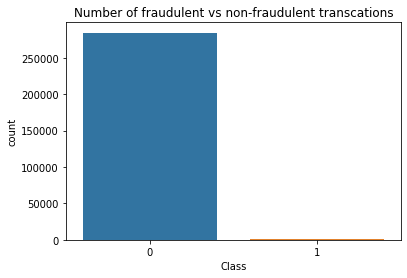

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

data is highly imbalance

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


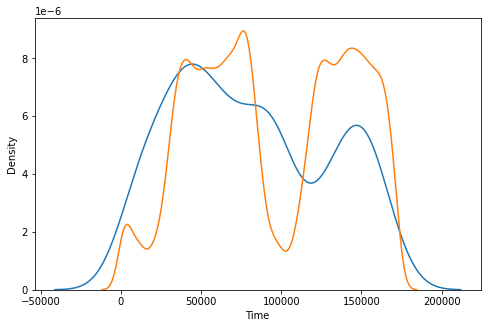

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.



In [ ]:
df.drop('Time', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


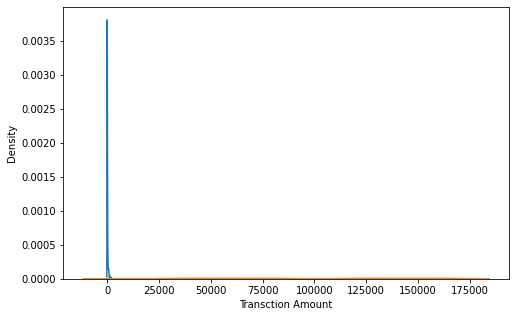

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

In [ ]:
#Seperate dependent and independent data 
x = df.drop("Class",axis=1)
y = df["Class"]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


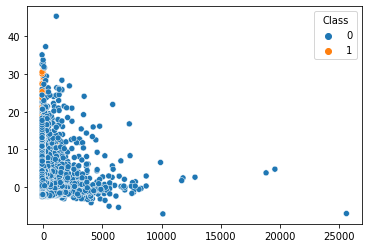

In [ ]:
#To check how the data points are scatter
pc = PCA(n_components=2)
components = pc.fit_transform(x,y)
pc1 = components[:,0]
pc2 = components[:,1]
sns.scatterplot(pc1,pc2,hue=y)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

**#OverSampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
ros= RandomOverSampler(random_state=1)
xsample1,ysample1 = ros.fit_resample(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(ysample1).value_counts()

1    199019
0    199019
dtype: int64

In [ ]:
ss = StandardScaler()

X_train_ss1 = ss.fit_transform(xsample1)
X_test_ss = ss.transform(xtest)

In [ ]:
model1 = Sequential()
model1.add(Dense(64, input_dim=29, activation="relu"))
model1.add(Dense(64,activation="relu"))
model1.add(Dense(64,activation="relu"))


model1.add(Dense(1,activation="sigmoid"))
model1.compile(optimizer="sgd",loss="binary_crossentropy")
trained_model1 = model1.fit(X_train_ss1,ysample1,epochs=50,batch_size=32)

Epoch 1/50
12439/12439 [==============================] - 18s 1ms/step - loss: 0.0848
Epoch 2/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0161
Epoch 3/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0086
Epoch 4/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0061
Epoch 5/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0047
Epoch 6/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0038
Epoch 7/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0031
Epoch 8/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0026
Epoch 9/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0022
Epoch 10/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0020
Epoch 11/50
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0021
Epoch 12/50
12439/12439 [===========================

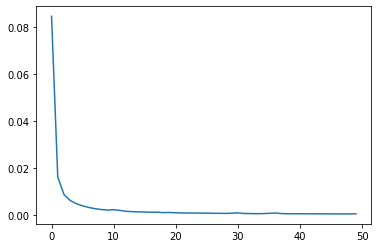

In [ ]:
plt.plot(trained_model1.history['loss'])

In [ ]:
y_pred1 = model1.predict(X_test_ss)

In [ ]:
y_pred1 = np.where(y_pred1 >= 0.5,1,0)

In [ ]:
print(f"{classification_report(ytest,y_pred1)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.80      0.80       147

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



**#SMOTE**

In [ ]:
oversample = SMOTE()
xsample2,ysample2 = oversample.fit_resample(xtrain,ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(ysample2).value_counts()

1    199019
0    199019
dtype: int64

In [ ]:
X_train_ss2 = ss.fit_transform(xsample2)

In [ ]:
model2 = Sequential()
model2.add(Dense(128, input_dim=29, activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))
model2.compile(optimizer="adam",loss="binary_crossentropy")
trained_model2 = model2.fit(X_train_ss2,ysample2,epochs=50)

Epoch 1/50
12439/12439 [==============================] - 29s 2ms/step - loss: 0.0170
Epoch 2/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0058
Epoch 3/50
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0040
Epoch 4/50
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0036
Epoch 5/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0032
Epoch 6/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0034
Epoch 7/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0026
Epoch 8/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0027
Epoch 9/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0024
Epoch 10/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0024
Epoch 11/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0027
Epoch 12/50
12439/12439 [===========================

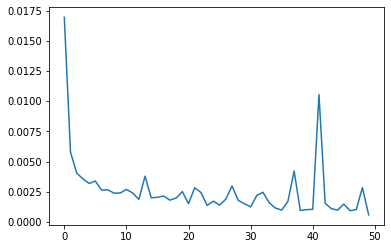

In [ ]:
plt.plot(trained_model2.history['loss'])

In [ ]:
y_pred2 = model2.predict(X_test_ss)
y_pred2 = np.where(y_pred2 >= 0.5,1,0)
print(f"{classification_report(ytest,y_pred2)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.75      0.76       147

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



**#UnderSampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=1)
xsample3,ysample3 = rus.fit_resample(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(ysample3).value_counts()

1    345
0    345
dtype: int64

In [ ]:
X_train_ss3 = ss.fit_transform(xsample3)

In [ ]:
model3 = Sequential()
model3.add(Dense(32, input_dim=29, activation="relu"))
model3.add(Dense(32,activation="relu"))

model3.add(Dense(1,activation="sigmoid"))
model3.compile(optimizer="adam",loss="binary_crossentropy")
trained_model3 = model3.fit(X_train_ss3,ysample3,epochs=80)

Epoch 1/80
22/22 [==============================] - 0s 2ms/step - loss: 0.5541
Epoch 2/80
22/22 [==============================] - 0s 2ms/step - loss: 0.3904
Epoch 3/80
22/22 [==============================] - 0s 2ms/step - loss: 0.3061
Epoch 4/80
22/22 [==============================] - 0s 2ms/step - loss: 0.2610
Epoch 5/80
22/22 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 6/80
22/22 [==============================] - 0s 2ms/step - loss: 0.2091
Epoch 7/80
22/22 [==============================] - 0s 2ms/step - loss: 0.1920
Epoch 8/80
22/22 [==============================] - 0s 2ms/step - loss: 0.1784
Epoch 9/80
22/22 [==============================] - 0s 2ms/step - loss: 0.1675
Epoch 10/80
22/22 [==============================] - 0s 2ms/step - loss: 0.1595
Epoch 11/80
22/22 [==============================] - 0s 2ms/step - loss: 0.1509
Epoch 12/80
22/22 [==============================] - 0s 2ms/step - loss: 0.1440
Epoch 13/80
22/22 [==============================

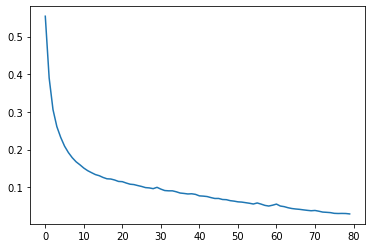

In [ ]:
plt.plot(trained_model3.history['loss'])

In [ ]:
y_pred3 = model3.predict(X_test_ss)
y_pred3 = np.where(y_pred3 >= 0.5,1,0)
print(f"{classification_report(ytest,y_pred3)}")

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85296
           1       0.02      0.95      0.05       147

    accuracy                           0.93     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.93      0.96     85443



**#Conclusion:**


So, here I tried 3 diffrent model to balance the dataset. we have noticed that model have perform more and less in terms of pricision and recall. so, after noticing all the model I conclude that RandomOverSampling performs well in both precision and recall, and as we are concern about fraudulent data(recall) UnderSampling is performing good compare to others.